In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
case = pd.read_csv("C://Users//aishw//OneDrive//Desktop//1000 compines.csv")

In [4]:
case.shape

(1000, 5)

In [5]:
case.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
case.isnull().sum()

R&D_Spend          5
Administration     4
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [7]:
a=case.fillna(0)

In [8]:
a.isnull().sum()

R&D_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [39]:
y=a['Profit']
y.head(2)

0    192261.83
1    191792.06
Name: Profit, dtype: float64

In [40]:
x=a[['Administration','Marketing_Spend','R&D_Spend']]
x.head(2)

,Administration,Marketing_Spend,R&D_Spend
0,136897.80,471784.10,165349.2
1,151377.59,443898.53,162597.7


In [11]:
x=x.rename(columns={'R&D_Spend':'RandD'})

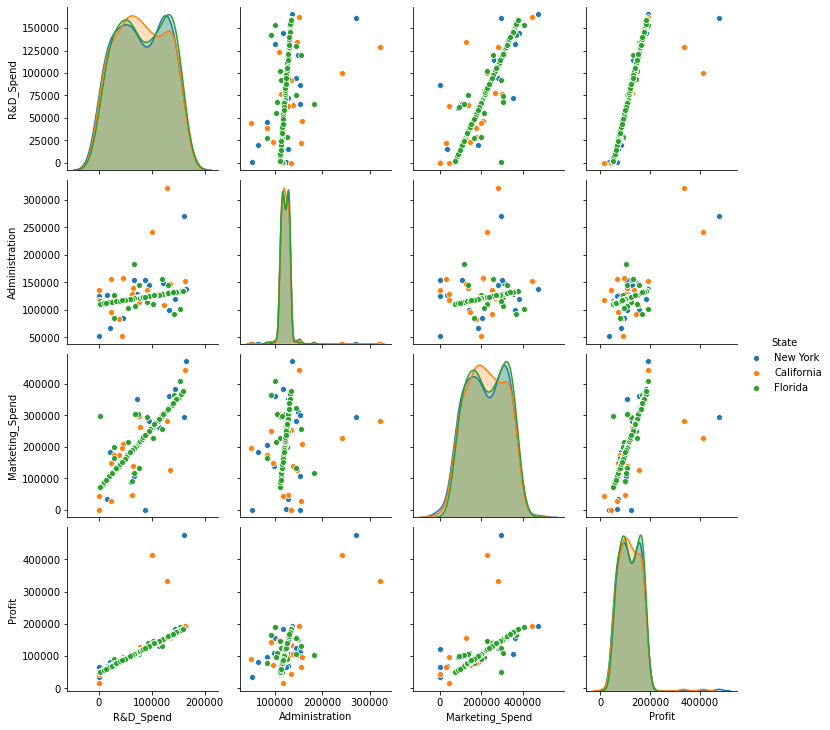

In [12]:
sns.pairplot(case,hue='State')

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model=LinearRegression()

In [41]:
model.fit(x,y)

LinearRegression()

In [42]:
model.score(x,y)

0.9225469327090983

-0.04788919904256987

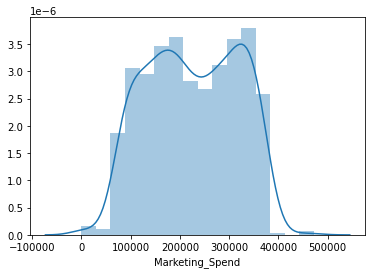

In [43]:
sns.distplot(a['Marketing_Spend'])
a['Marketing_Spend'].skew()

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state =1234)

In [46]:
x_train.shape

(700, 3)

In [47]:
y_train.shape

(700,)

In [48]:
x_test.shape

(300, 3)

In [49]:
y_test.shape

(300,)

In [50]:
new_data=pd.DataFrame({'Administration':[40000,50000,60000],'Marketing_Spend':[100000,80000,75000],'RandD':[50000,90000,55000]})

In [51]:
new_data

,Administration,Marketing_Spend,RandD
0,40000,100000,50000
1,50000,80000,90000
2,60000,75000,55000


In [52]:
model_train=model.fit(x_train,y_train)

In [53]:
model_train

LinearRegression()

In [54]:
model_train.coef_

array([0.33343985, 0.03440108, 0.73892524])

In [55]:
model_train.intercept_

10267.76081728068

In [56]:
y=(0.33343985*Administration)+(0.03440108*Marketing_Spend)+(0.73892524*RandD)+10267.76081728068
y

80696.15111728068

In [57]:
Administration = 70000
Marketing_Spend = 80000
RandD = 60000

In [58]:
pred=model_train.predict(x_test)
pred

array([ 92947.35724627, 165796.56118904, 106031.31319963, 119934.77890869,
       103188.23819714,  91685.19259344,  65386.53510675, 109225.60668805,
       176296.36964623, 169782.16440349,  66305.17220795, 106467.13172398,
        89181.37241649, 112214.80909545, 155032.69801837, 174519.76821546,
       113457.9692864 , 163928.52334017, 158079.15499949,  76987.39606104,
       104599.94842631, 136099.37372433,  52914.43417446,  91252.79224054,
       181224.53722868,  59219.2756187 ,  83798.58624661,  60219.09459376,
       134726.11806904, 129392.89560871, 169871.89175597, 182787.50213659,
       141732.54188855, 181573.19205758,  55525.07266286, 143328.83406318,
        80486.36541628, 165961.48862368,  99647.85353685, 159712.19267895,
       181862.88321036,  92068.02927015,  88002.87468095, 113895.70134872,
       107314.84150244,  53916.81680345, 105951.84043161, 185359.68601948,
        57223.05584072, 106661.11370269, 141986.3420877 , 138300.68458058,
        54082.59875354,  

In [59]:
model_train.score(x_train,y_train)

0.9779581782442167

In [60]:
model_train.score(x_test,y_test)

0.8057842640606183